# Fourier Fun

This notebook explores Fourier transforms Python.

Date Created: 27 Sep 2022
<br>
Last Modified: 27 Sep 2022

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

from IPython.display import Image, Audio

font_size = 25
plt.rcParams.update({'font.size': font_size})

#  A toy example

In [28]:
t = np.arange(0,3,0.05)

len(t)

60

In [29]:
wave_1 = 2*np.sin(2*np.pi*1 * t)       # 2sin(2pi t)
wave_2 = 3*np.sin(2*np.pi*2 * t + 0.3) # 3sin(4pi t +0.3)

f = wave_1 + wave_2

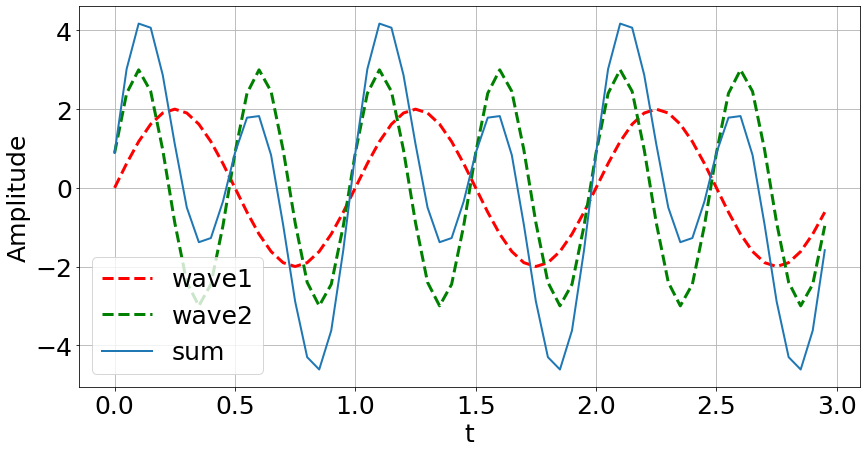

In [30]:
fig = plt.figure(figsize=(14,7))
plt.plot(t, wave_1, 'r--', lw=3, label='wave1')
plt.plot(t, wave_2, 'g--', lw=3, label='wave2')
plt.plot(t, f, linewidth=2, label='sum')

plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid()

plt.show()

In [31]:
F = np.fft.fft(f)

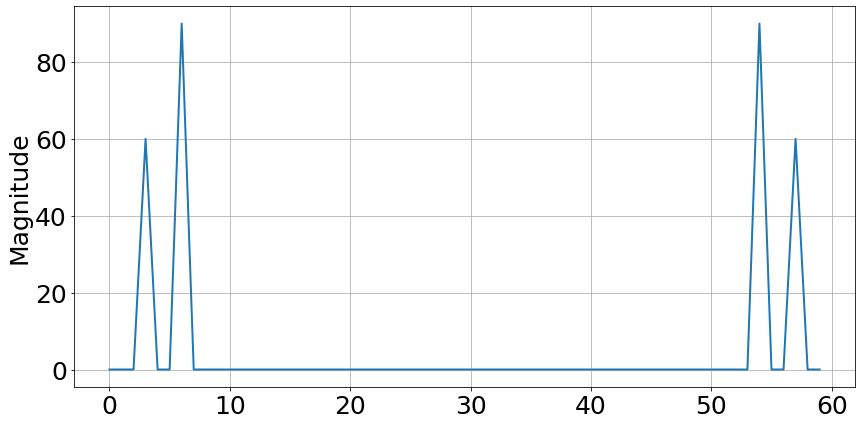

In [32]:
fig = plt.figure(figsize=(14,7))
plt.plot(np.abs(F), linewidth=2)

# plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

plt.show()

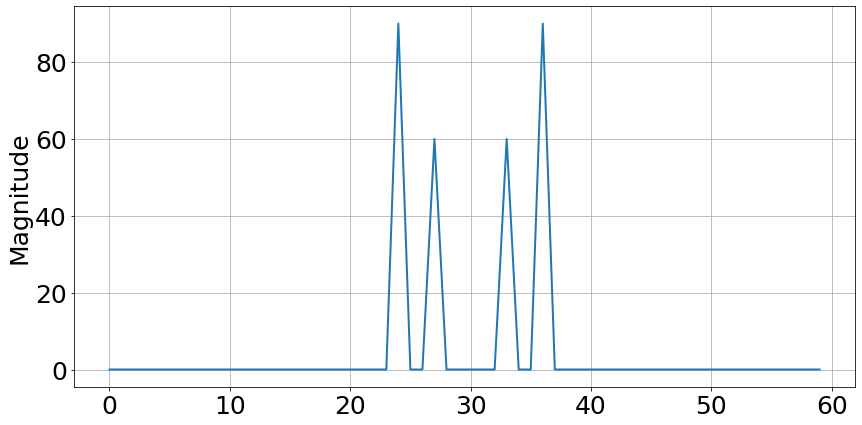

In [33]:
fig = plt.figure(figsize=(14,7))
plt.plot(np.fft.fftshift(np.abs(F)), linewidth=2)

# plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

plt.show()

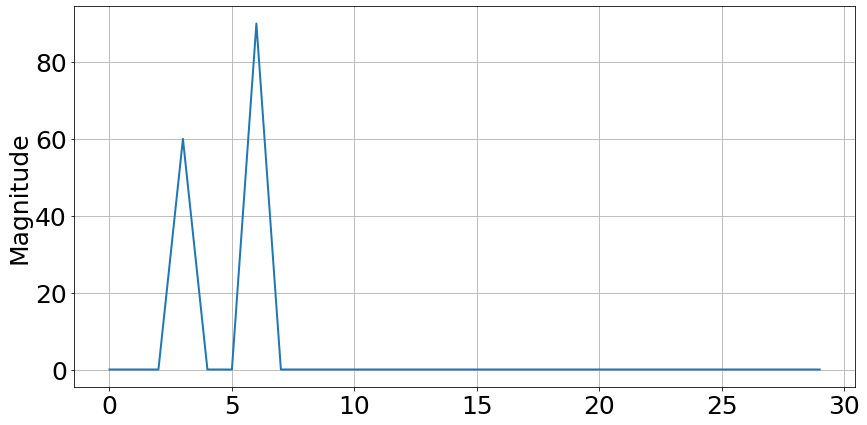

In [35]:
fig = plt.figure(figsize=(14,7))
plt.plot((np.abs(F)[0:30]), linewidth=2)

# plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

plt.show()

# 1D signal
[Electrocardiography](https://en.wikipedia.org/wiki/Electrocardiography) (ECG) data originally from:
<br>
ftp://ftp.ieee.org/uploads/press/rangayyan

In [37]:
f_ecg = np.genfromtxt("data_ft/ecg3.txt")

# Put it on a nice scale
f_ecg = f_ecg - np.mean(f_ecg)
f_ecg = f_ecg/np.max(f_ecg)

# Number of samples
N_sample = len(f_ecg)

# Sampled at 200Hz
s = 200
t = (1/s) * np.arange(N_sample)
freq = s/N_sample * np.arange(N_sample)

# Simulate some additive 50Hz noise
f_ecg = f_ecg + 0.2*np.sin(2*np.pi*50 * t)

In [38]:
np.arange(N_sample)

array([   0,    1,    2, ..., 3997, 3998, 3999])

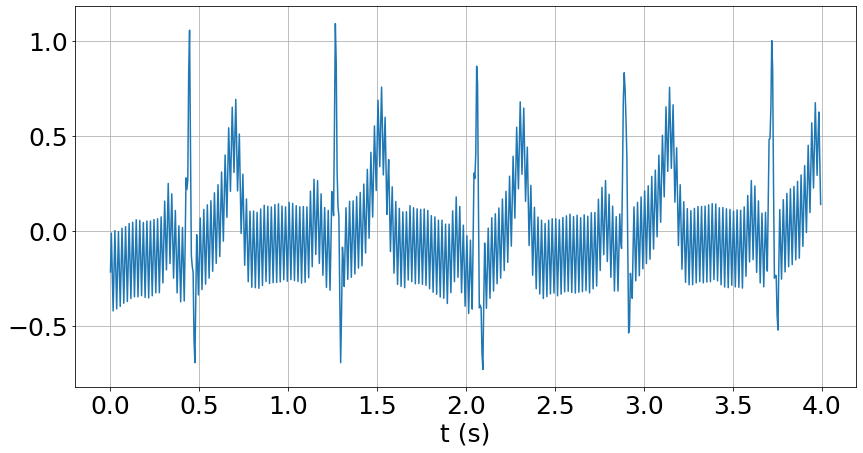

In [40]:
fig = plt.figure(figsize=(14,7))
plt.plot(t[0:800], f_ecg[0:800])
plt.xlabel('t (s)')
plt.grid()
plt.show()

In [41]:
F_ecg = np.fft.fft(f_ecg)

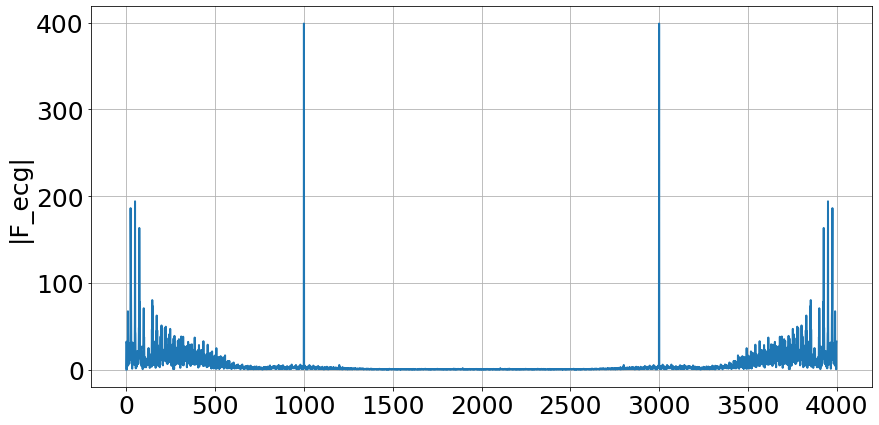

In [43]:
fig = plt.figure(figsize=(14,7))
plt.plot(np.abs(F_ecg), linewidth=2)

# plt.xlabel('frequency (Hz)')
plt.ylabel('|F_ecg|')
plt.grid()

plt.show()

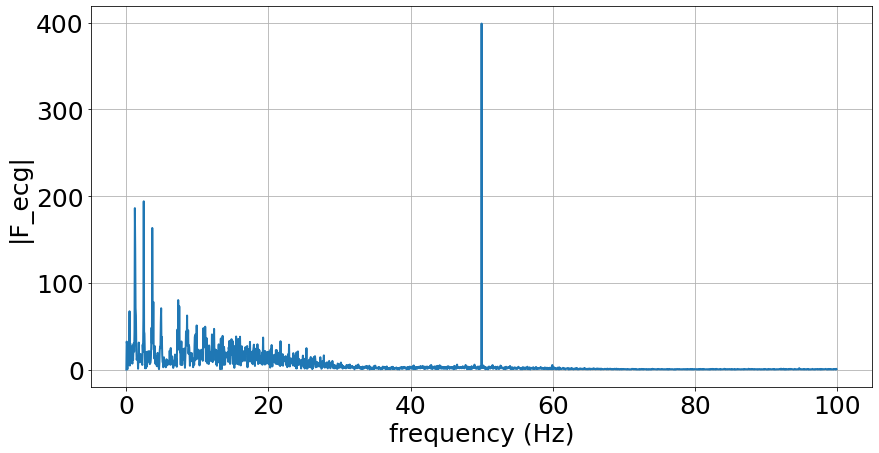

In [45]:
# Only need to keep half as the signal is real-valued.

fig = plt.figure(figsize=(14,7))
plt.plot(freq[0:int(N_sample/2)], np.abs(F_ecg[0:int(N_sample/2)]), linewidth=2)

plt.xlabel('frequency (Hz)')
plt.ylabel('|F_ecg|')
plt.grid()

plt.show()

In [46]:
# Make the filter 
filter_mag = np.ones(N_sample)
filter_mag[900:1100] = 0
filter_mag[2900:3100] = 0

In [47]:
# Do the filtering
F_ecg_filtered = F_ecg * filter_mag

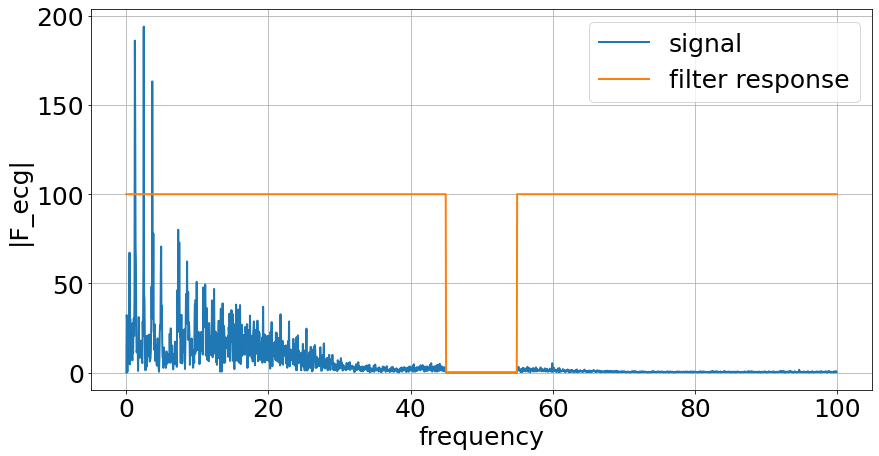

In [49]:
fig = plt.figure(figsize=(14,7))
plt.plot(freq[0:int(N_sample/2)], np.abs(F_ecg_filtered[0:int(N_sample/2)]), linewidth=2, label='signal')
plt.plot(freq[0:int(N_sample/2)], 100*filter_mag[0:int(N_sample/2)], linewidth=2, label='filter response')

plt.xlabel('frequency')
plt.ylabel('|F_ecg|')
plt.grid()
plt.legend()

plt.show()

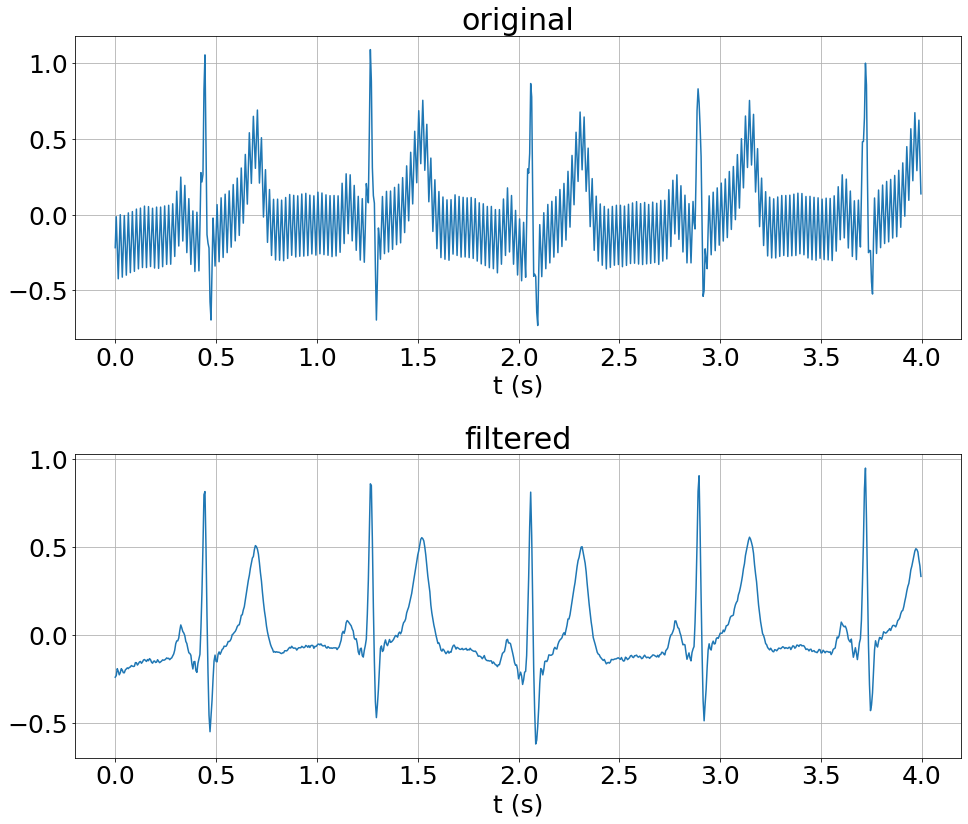

In [54]:
f_ecg_filtered = np.fft.ifft(F_ecg_filtered)

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(211)
plt.plot(t[0:800], (f_ecg[0:800]))
plt.grid()
ax.set_xlabel("t (s)")
ax.set_title("original")
ax = fig.add_subplot(212)
plt.plot(t[0:800], np.real(f_ecg_filtered[0:800]))
plt.grid()
ax.set_xlabel("t (s)")
ax.set_title("filtered")

plt.tight_layout()
plt.show()

# 2D signal

In [65]:
# from scipy.misc import imread

f = plt.imread("data_ft/HTsquirel.jpeg")

f = f + 0.0 # Convert to double
f = f / np.max(f)
f = f[:,:,0] # Just grab one of the channels


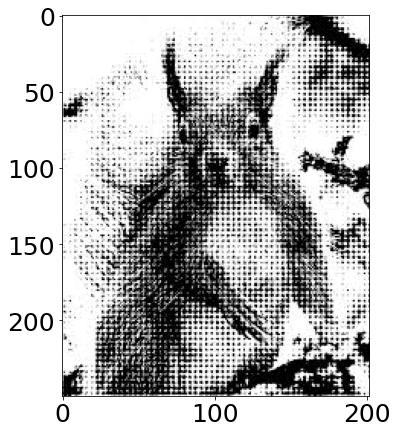

In [66]:
plt.figure(figsize=(14,7))
plt.imshow(f, cmap='gray')
plt.show()

In [67]:
F = np.fft.fftn(f)

In [68]:
F.shape

(250, 202)

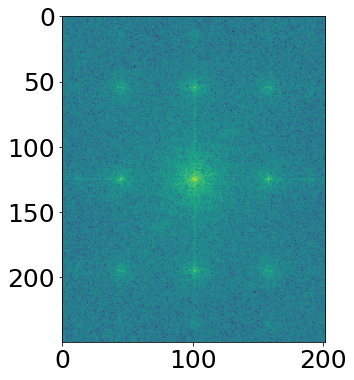

In [69]:
plt.figure(figsize=(6,6))
plt.imshow(np.fft.fftshift(np.log10(np.abs(F))))
plt.show()

In [92]:
# Make a filter

mask = np.ones_like(f)

d = 10
mask[196-d:196+d, 100-d:100+d]  = 0
mask[  56-d:56+d, 100-d:100+d]  = 0
mask[126-d:126+d,   44-d:44+d]  = 0
mask[126-d:126+d, 158-d:158+d]  = 0

mask[196-d:196+d, 44-d:44+d] = 0
mask[  56-d:56+d, 44-d:44+d] = 0
mask[  56-d:56+d, 158-d:158+d] = 0
mask[196-d:196+d, 158-d:158+d] = 0
# mask[  126-3*d:126+3*d, 100-3*d:100+3*d] = 0

# Mask the FT
F_masked = np.fft.fftshift(F) * mask

/var/folders/dw/3pt2_w855cd7w3pwfhkfblzr0000gn/T/ipykernel_44729/226576244.py:6: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(np.abs(F_masked)), interpolation='nearest')


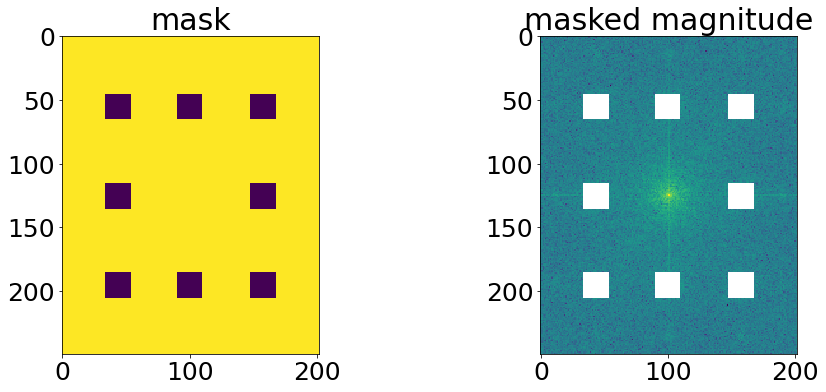

In [93]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
im = ax.imshow(mask, interpolation='nearest')
ax.set_title("mask")
ax = fig.add_subplot(122)
im = ax.imshow(np.log10(np.abs(F_masked)), interpolation='nearest')
ax.set_title('masked magnitude')

plt.show()

In [89]:
F_masked = np.fft.ifftshift(F_masked)

In [90]:
f_masked = np.fft.ifftn(F_masked)

f_masked[f_masked > 1] = 1

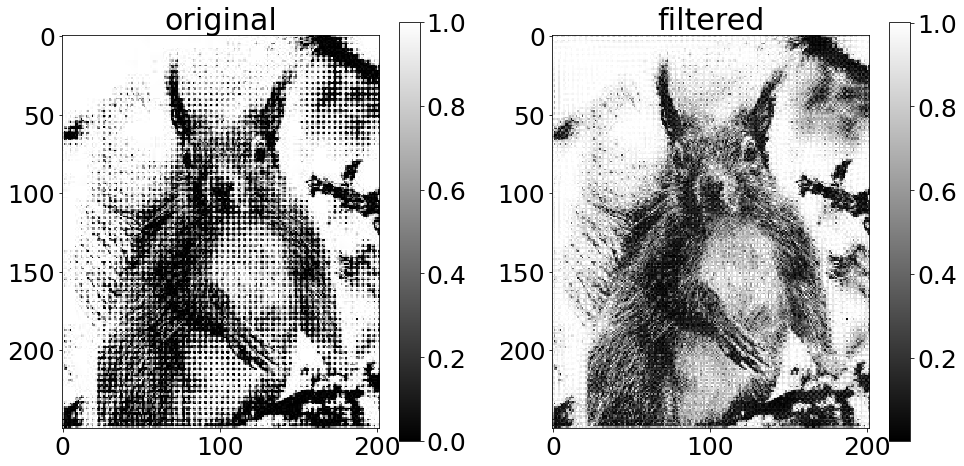

In [91]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121)
im = ax.imshow(f, interpolation='nearest', cmap='gray')
ax.set_title("original")
fig.colorbar(im)
ax = fig.add_subplot(122)
im = ax.imshow(np.abs(f_masked), interpolation='nearest', cmap='gray')
ax.set_title("filtered")
fig.colorbar(im)

plt.tight_layout()
plt.show()